# Decision Tree

In [1]:
# import function
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # 決策樹模組

In [4]:
# load data
iris = datasets.load_iris()
X=iris.data
y=iris.target

# 20% for test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# run~
tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)
tree.fit(X_train, y_train) # train
pretest = tree.predict(X_test) # test

# Error rate
error = 0
count = 0
for i, v in enumerate(tree.predict(X_test)):
    count += 1
    if v != y_test[i]:
        error += 1
print('總計數',count)
print('總錯誤',error)
print('score',tree.score(X_test,y_test))

總計數 30
總錯誤 1
score 0.9666666666666667


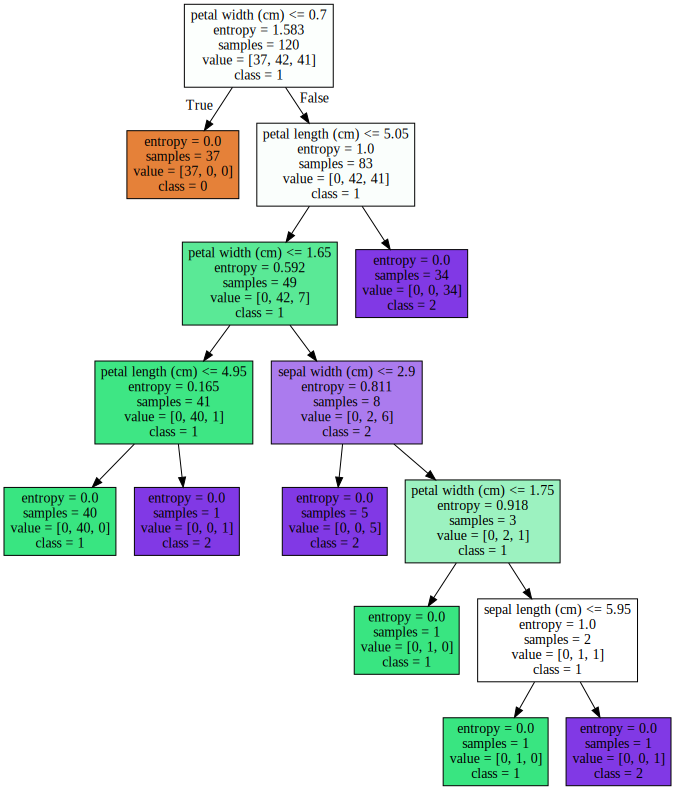

In [5]:
# visualize
from sklearn.tree import export_graphviz
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
graph = Source(export_graphviz(tree,
                               out_file     = None,
                               feature_names= iris.feature_names,
                               class_names  = ['0','1','2'],
                               filled       = True))
                                    
display(SVG(graph.pipe(format='svg')))

# entropy為度量資訊量的方法，資料不需要分類 該值則為0，數字越大代表資料越雜亂，下圖中不等於0的都會繼續分類

# RandomForest

In [15]:
# 測試視覺化
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']],
    iris_data[['target']],
    test_size=0.3,
    random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train,y_train)
tree.predict(X_test)


error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print("錯誤項",i,v)
        error+=1
print('error:',error)
print('分數:',tree.score(X_test,y_test['target']))

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

error: 0
分數: 1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


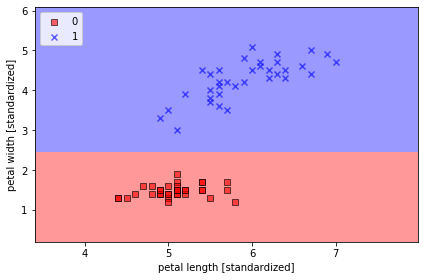

In [17]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()